# Quicksort

In [1]:
def swappity(array,left,right):
    ####used for easy swapping by element
    #print(array)
    tmp = array[left]
    array[left] = array[right]
    array[right] = tmp
    #print(array)
    
def recurse(array,first,last):
    ####first and last just to keep things from getting screwy
    if last > first:
        ####find the new separator for the two new lists
        sep = split_compare(first,last,array)
        ####continue processing two sides after you know which element to split on
        right_start = 1+sep
        left_end = -1+sep
        ####recurse
        recurse(array,right_start,last)
        recurse(array,first,left_end)

def split_compare(first,last,array):
    ###define values; remember first has changed by this point
    #print(array)
    left = 1+first
    right = last
    pivot = array[first]
    while True:
        #print(array)
        ### find indices to swap by testing coming into the middle element from both sides
        while left <= right and array[left] <= pivot:
            #print(left,pivot)
            left +=1
        while array[right] >= pivot and right >= left:
            #print(pivot)
            right -= 1
        ###test if right and left pointers have crossed
        if left > right:
            break
        swappity(array,left,right)
    swappity(array,first,right)
    ####return the right pointer because it points to last element of leftside new list
    return right

def quicksort(array):
    ##this is the main function
    ####need to recurse!!
    ####since python everything will be modified in reference, no need to create two new lists
    last = len(array)-1
    ###
    recurse(array,0,last)
    print(array)
    

### I count:
### 12 assignments
### 3 conditionals

### testing

In [2]:
#####testing
###basic
test = [5,2,8,3,6]
quicksort(test)

[2, 3, 5, 6, 8]


In [3]:
#####testing
###empty
test = []
quicksort(test)

[]


In [4]:
#####testing
###single element
test = [5]
quicksort(test)

[5]


In [5]:
#####testing
###duplicates : 2X 2 2X 5, 2X 8
test = [5,2,2,8,8,3,6,5]
quicksort(test)

[2, 2, 3, 5, 5, 6, 8, 8]


In [6]:
#####testing
###odd length, even length
test = [5,2,8,3,6]
quicksort(test)

[2, 3, 5, 6, 8]


In [7]:
#####testing
###odd length, even length
test = [5,2,8,3,6,0.07]
quicksort(test)

[0.07, 2, 3, 5, 6, 8]


### time / complexity testing

In [8]:
import random

#####create 2D array of size [100][100,200,300...1000]
#####first val is number of reps, second is length of array
test = []
tmp2 = []
tmp1 = []
for i in range(100):
    tmp2 = []
    for j in range(10):
        tmp1_size = 100*(j+1)
        tmp1 = random.sample(range(1,5000),tmp1_size)
        tmp2.append(tmp1)
    test.append(tmp2)
####show shapes
print(len(test[0][0]))
print(len(test[0][1]))
print(len(test[0][2]))
print(len(test[99][2]))
######
print('okay so test list shapes are clear')

100
200
300
300
okay so test list shapes are clear


In [9]:
#######test vectors, print out runtimes
import time

def count_runtime(fn,fn_in):
    start = time.time()
    ####execute
    fn(fn_in)
    ####
    end = time.time()
    return(end-start)
    
#####times is an array of 10 lists
times = []
tmp1 = []
tmp2 = []
for j in range(10):
    tmp1 = []
    for i in range(100):
        tmp_time = count_runtime(quicksort,test[i][j])
        tmp1.append(tmp_time)
    times.append(tmp1)
######
print('okay so now I got the times')

[128, 153, 194, 234, 268, 319, 329, 392, 514, 531, 576, 588, 754, 755, 757, 796, 859, 919, 957, 979, 997, 998, 1125, 1141, 1170, 1196, 1277, 1344, 1433, 1457, 1577, 1580, 1608, 1624, 1671, 1781, 1791, 1807, 1824, 1848, 1870, 1878, 2055, 2075, 2141, 2219, 2227, 2287, 2291, 2305, 2311, 2340, 2476, 2526, 2636, 2640, 2654, 2670, 2740, 2987, 3033, 3087, 3137, 3167, 3232, 3253, 3264, 3273, 3299, 3329, 3344, 3415, 3482, 3489, 3526, 3549, 3584, 3614, 3645, 3721, 3729, 3837, 3911, 3923, 3973, 4008, 4015, 4030, 4061, 4081, 4097, 4171, 4283, 4299, 4440, 4460, 4565, 4623, 4723, 4977]
[40, 121, 214, 321, 331, 413, 546, 597, 657, 709, 797, 833, 860, 893, 1008, 1032, 1046, 1100, 1164, 1200, 1285, 1309, 1373, 1406, 1489, 1490, 1553, 1590, 1683, 1702, 1705, 1759, 1832, 1857, 2087, 2151, 2171, 2278, 2362, 2453, 2460, 2535, 2604, 2676, 2703, 2754, 2803, 2918, 2993, 2997, 3038, 3046, 3107, 3114, 3159, 3162, 3208, 3247, 3289, 3336, 3343, 3377, 3380, 3392, 3408, 3411, 3435, 3495, 3533, 3570, 3616, 3711, 383

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



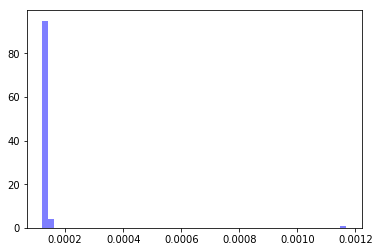

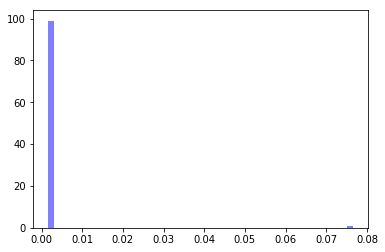

okay so these are normalish


In [15]:
import matplotlib.pyplot as plt

#####plot 100 length
num_bins = 50
n, bins, patches = plt.hist(times[0], num_bins, facecolor='blue', alpha=0.5)
plt.show()
#####plot 1000 length
num_bins = 50
n, bins, patches = plt.hist(times[9], num_bins, facecolor='blue', alpha=0.5)
plt.show()
#####
print('okay so these are normalish')

In [11]:
#######plot median times
import statistics as stats
medians = []
for i in range(10):
    tmp_median = stats.median(times[i])
    print(tmp_median)
    medians.append(tmp_median)


0.00013065338134765625
0.0002816915512084961
0.0004506111145019531
0.000624537467956543
0.0007950067520141602
0.0009704828262329102
0.0011748075485229492
0.0013843774795532227
0.001575469970703125
0.001746058464050293


In [31]:
########find C constant
def power(my_list,exp):
    return [ x**exp for x in my_list ]

import numpy as np
###constant backcalculated using nlogn model
c = (2.718**(medians[9]/1000))/1000
#########define n's
n = np.array([100,200,300,400,500,600,700,800,900,1000])
######calculate theoreticals of C*n^2
ideal_n2 = c * np.square(n)
ideal_nlogn = c * n*(np.log(n))

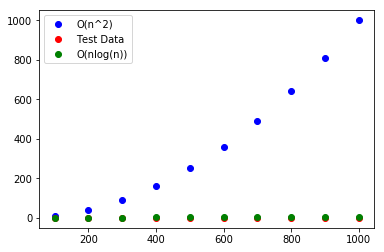

In [32]:
#########plot 
plt.plot(n, ideal_n2, 'bo',label='O(n^2)')
plt.plot(n, medians, 'ro',label='Test Data')
plt.plot(n, ideal_nlogn, 'go',label='O(nlog(n))')
plt.legend(loc='upper left')
plt.show()
savefig('bigO_quicksort.png')

## the test data most closely approximates a O(nlog(n)) model although it lies below the theoretical threshold